In [2]:
dataset

,Region,State,City,Customer ID,Segment,Product ID,Product Name,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Central,Illinois,Arlington Heights,SC-20845,Consumer,OFF-AR-10003394,Newell 332,Office Supplies,Art,14.112,6,0.2,1.2348
1,Central,Illinois,Aurora,EH-14125,Home Office,FUR-CH-10001215,Global Troy Executive Leather Low-Back Tilter,Furniture,Chairs,701.372,2,0.3,-50.0980
2,Central,Illinois,Aurora,EH-14125,Home Office,OFF-BI-10004654,Avery Binding System Hidden Tab Executive Styl...,Office Supplies,Binders,2.308,2,0.8,-3.4620
3,Central,Illinois,Aurora,JK-16120,Home Office,FUR-FU-10003394,"Tenex ""The Solids"" Textured Chair Mats",Furniture,Furnishings,83.952,3,0.6,-90.2484
4,Central,Illinois,Aurora,CK-12760,Corporate,FUR-TA-10002958,"Bevis Oval Conference Table, Walnut",Furniture,Tables,652.450,5,0.5,-430.6170
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,West,Washington,Vancouver,AR-10825,Corporate,TEC-PH-10003273,AT&T TR1909W,Technology,Phones,302.376,3,0.2,22.6782
9990,West,Washington,Vancouver,AR-10825,Corporate,TEC-AC-10001142,First Data FD10 PIN Pad,Technology,Accessories,316.000,4,0.0,31.6000
9991,West,Washington,Vancouver,FM-14290,Home Office,OFF-AR-10002956,Boston 16801 Nautilus Battery Pencil Sharpener,Office Supplies,Art,44.020,2,0.0,11.4452
9992,West,Washington,Vancouver,JW-15220,Corporate,FUR-FU-10002885,Magna Visual Magnetic Picture Hangers,Furniture,Furnishings,9.640,2,0.0,3.6632


In [7]:
#Data Frame of an online store in Mainland United States
import pandas as pd

#Getting rid of Unecessary Columns and Data
dataset = pd.read_csv("SuperstoreDataset.csv")
dataset = dataset.drop(columns=["Customer Name","Country","Postal Code","Unnamed: 17"]).sort_values(["Region","State","City"],ascending=[True,True,True])[["Region","State","City","Customer ID","Segment","Product ID","Product Name","Category","Sub-Category","Sales","Quantity","Discount","Profit"]].reset_index().drop(columns=["index"])
dataset

#Isolating necessary columns for product wise sales
df1 = dataset[['Category','Sub-Category','Sales','Profit']]
df1 = df1.sort_values(["Category","Sub-Category"])

#Check for unique categories
df1["Category"].unique()

#Seperate by unique category
furniture_cond = df1["Category"] == "Furniture"
office_cond = df1["Category"] == "Office Supplies"
tech_cond = df1["Category"] == "Technology"

furniture_df = df1.loc[furniture_cond,:]
office_df = df1.loc[office_cond,:]
tech_df = df1.loc[tech_cond,:]

#Getting sales and profit per subcategory
agg_func = {'Category': 'first', 'Sales': 'sum', 'Profit': 'sum'}
furniture_df = furniture_df.groupby(furniture_df['Sub-Category']).aggregate(agg_func)
office_df = office_df.groupby(office_df['Sub-Category']).aggregate(agg_func)
tech_df = tech_df.groupby(tech_df['Sub-Category']).aggregate(agg_func)

#Sort Sales and Profits in descending order

furniture_sales_df = furniture_df.sort_values(["Sales"],ascending=False)
furniture_profit_df = furniture_df.sort_values(["Profit"],ascending=False)
office_sales_df = office_df.sort_values(["Sales"],ascending=False)
office_profit_df = office_df.sort_values(["Profit"],ascending=False)
tech_sales_df = tech_df.sort_values(["Sales"],ascending=False)
tech_profit_df = tech_df.sort_values(["Profit"],ascending=False)

#Remove Index

furniture_sales_df.reset_index(inplace=True,drop=False)
furniture_profit_df.reset_index(inplace=True,drop=False)
office_sales_df.reset_index(inplace=True,drop=False)
office_profit_df.reset_index(inplace=True,drop=False)
tech_sales_df.reset_index(inplace=True,drop=False)
tech_profit_df.reset_index(inplace=True,drop=False)

#dump
df1
furniture_sales_df
#furniture_profit_df
#office_sales_df 
#office_profit_df 
#tech_sales_df  
#tech_profit_df 

,Sub-Category,Category,Sales,Profit
0,Chairs,Furniture,328449.1030,26590.1663
1,Tables,Furniture,206965.5320,-17725.4811
2,Bookcases,Furniture,114879.9963,-3472.5560
3,Furnishings,Furniture,91705.1640,13059.1436


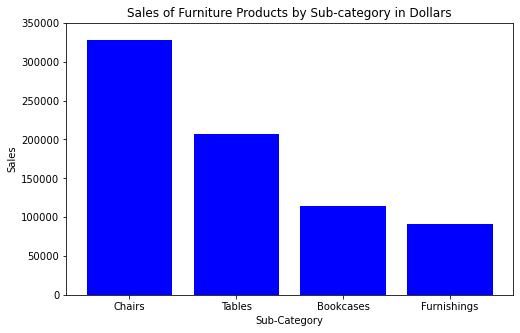

In [5]:
#Plotting Bar Graph (Furniture Sales)
import matplotlib.pyplot as plt 
import numpy as np

#Getting x and y axis
X = list(furniture_sales_df["Sub-Category"])
Y = list(furniture_sales_df["Sales"])

  
# Plotting data
f = plt.figure(figsize=(8,5))
plt.bar(X, Y, color='b')
plt.title("Sales of Furniture Products by Sub-category in Dollars")
plt.xlabel("Sub-Category")
plt.ylabel("Sales")
y_ticks = np.arange(0,400000,50000)
plt.yticks(y_ticks)


f.savefig("Sales of Furniture Products by Sub-category in Dollars.png")
plt.show()

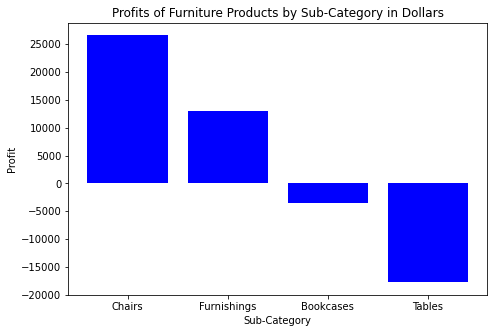

In [6]:
#Plotting Bar Graph (Furniture Profits)
import matplotlib.pyplot as plt 
import numpy as np

#Getting x and y axis
X = list(furniture_profit_df["Sub-Category"])
Y = list(furniture_profit_df["Profit"])

  
# Plotting data
f = plt.figure(figsize=(7.5,5))
plt.bar(X, Y, color='b')
plt.title("Profits of Furniture Products by Sub-Category in Dollars")
plt.xlabel("Sub-Category")
plt.ylabel("Profit")
y_ticks = np.arange(-20000,30000,5000)
plt.yticks(y_ticks)


f.savefig("Profits of Furniture Products by Sub-Category in Dollars.png")
plt.show()

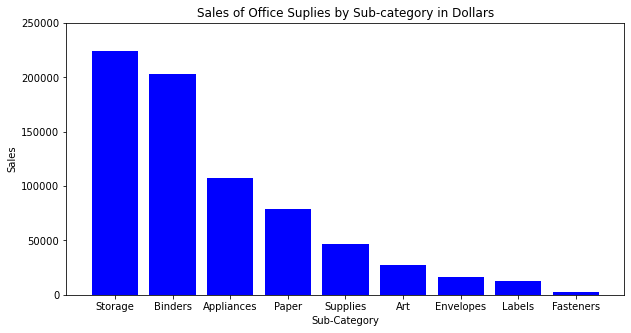

In [7]:
#Plotting Bar Graph (Office Suplies Sales)
import matplotlib.pyplot as plt 
import numpy as np

#Getting x and y axis
X = list(office_sales_df["Sub-Category"])
Y = list(office_sales_df["Sales"])

  
# Plotting data
f = plt.figure(figsize=(10,5))
plt.bar(X, Y, color='b')
plt.title("Sales of Office Suplies by Sub-category in Dollars")
plt.xlabel("Sub-Category")
plt.ylabel("Sales")
y_ticks = np.arange(0,260000,50000)
plt.yticks(y_ticks)


f.savefig("Sales of Office Suplies by Sub-category in Dollars.png")
plt.show()

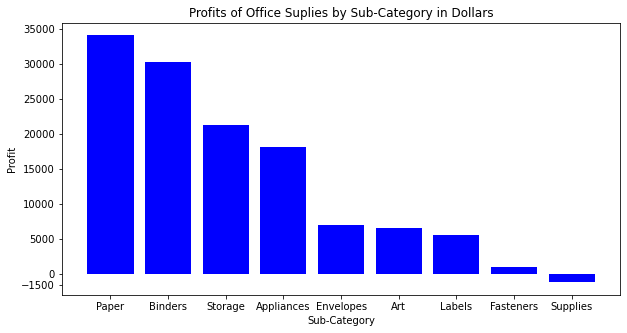

In [8]:
#Plotting Bar Graph (Office Suplies Profits)
import matplotlib.pyplot as plt 
import numpy as np

#Getting x and y axis
X = list(office_profit_df["Sub-Category"])
Y = list(office_profit_df["Profit"])

  
# Plotting data
f = plt.figure(figsize=(10,5))
plt.bar(X, Y, color='b')
plt.title("Profits of Office Suplies by Sub-Category in Dollars")
plt.xlabel("Sub-Category")
plt.ylabel("Profit")
y_ticks = (-1500,0,5000,10000,15000,20000,25000,30000,35000) 
plt.yticks(y_ticks)


f.savefig("Profits of Office Suplies by Sub-Category in Dollars.png")
plt.show()

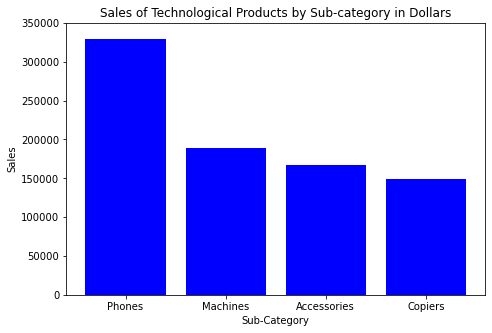

In [9]:
#Plotting Bar Graph (Technology Sales)
import matplotlib.pyplot as plt 
import numpy as np

#Getting x and y axis
X = list(tech_sales_df["Sub-Category"])
Y = list(tech_sales_df["Sales"])

  
# Plotting data
f = plt.figure(figsize=(7.5,5))
plt.bar(X, Y, color='b')
plt.title("Sales of Technological Products by Sub-category in Dollars")
plt.xlabel("Sub-Category")
plt.ylabel("Sales")
y_ticks = np.arange(0,360000,50000)
plt.yticks(y_ticks)


f.savefig("Sales of Technological Products by Sub-category in Dollars.png")
plt.show()

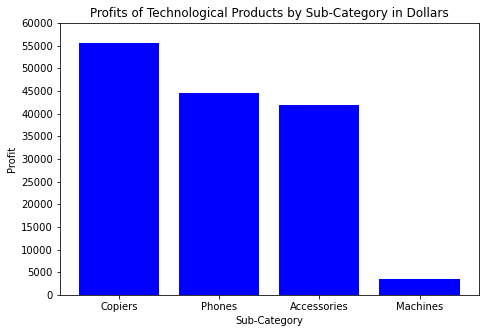

In [10]:
#Plotting Bar Graph (Technology Profits)
import matplotlib.pyplot as plt 
import numpy as np

#Getting x and y axis
X = list(tech_profit_df["Sub-Category"])
Y = list(tech_profit_df["Profit"])

  
# Plotting data
f = plt.figure(figsize=(7.5,5))
plt.bar(X, Y, color='b')
plt.title("Profits of Technological Products by Sub-Category in Dollars")
plt.xlabel("Sub-Category")
plt.ylabel("Profit")
y_ticks = np.arange(0,61000,5000)
plt.yticks(y_ticks)


f.savefig("Profits of Technological Products by Sub-Category in Dollars.png")
plt.show()

In [10]:
#Data Frame of an online store in Mainland United States
import pandas as pd

#Getting rid of Unecessary Columns and Data
dataset = pd.read_csv("SuperstoreDataset.csv")
dataset = dataset.drop(columns=["Customer Name","Country","Postal Code","Unnamed: 17"]).sort_values(["Region","State","City"],ascending=[True,True,True])[["Region","State","City","Customer ID","Segment","Product ID","Product Name","Category","Sub-Category","Sales","Quantity","Discount","Profit"]].reset_index().drop(columns=["index"])
dataset

#Isolating necessary columns for getting most popular subcategory by quantity sold
df1 = dataset[['Category','Sub-Category','Quantity']]
df1 = df1.sort_values(["Category","Sub-Category"])

#Seperate by unique Category
furniture_cond = df1["Category"] == "Furniture"
office_cond = df1["Category"] == "Office Supplies"
tech_cond = df1["Category"] == "Technology"

furniture_df1 = df1.loc[furniture_cond,:]
office_df1 = df1.loc[office_cond,:]
tech_df1 = df1.loc[tech_cond,:]

#Getting Total Quantity by Sub-Category
agg_func = {'Category': 'first', 'Quantity': 'sum'}
furniture_df1 = furniture_df1.groupby(furniture_df1['Sub-Category']).aggregate(agg_func)
office_df1 = office_df1.groupby(office_df1['Sub-Category']).aggregate(agg_func)
tech_df1 = tech_df1.groupby(tech_df1['Sub-Category']).aggregate(agg_func)

#Sort by Quantity
furniture_df1 = furniture_df1.sort_values(["Quantity"],ascending=False)
office_df1 = office_df1.sort_values(["Quantity"],ascending=False)
tech_df1 = tech_df1.sort_values(["Quantity"],ascending=False)

#Reset Index
furniture_df1.reset_index(inplace=True,drop=False)
office_df1.reset_index(inplace=True,drop=False)
tech_df1.reset_index(inplace=True,drop=False)

#dump furniture subcategories
df1
furniture_df1
#office_df1
#tech_df1

,Sub-Category,Category,Quantity
0,Furnishings,Furniture,3563
1,Chairs,Furniture,2356
2,Tables,Furniture,1241
3,Bookcases,Furniture,868


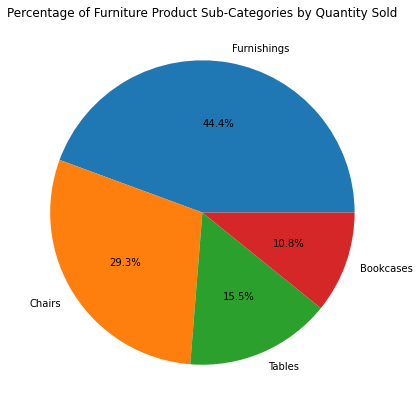

In [13]:
#Plotting Pie Chart (Furniture Sub-Categories by Quantity)
import matplotlib.pyplot as plt 

#https://www.geeksforgeeks.org/plot-a-pie-chart-in-python-using-matplotlib/
#http://www.learningaboutelectronics.com/Articles/How-to-create-a-pie-chart-in-matplotlib-with-Python.php

# Creating dataset
sub_cat = furniture_df1["Sub-Category"]
data = furniture_df1["Quantity"]
  
# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = sub_cat,autopct='%1.1f%%')
plt.title("Percentage of Furniture Product Sub-Categories by Quantity Sold")

# show plot
fig.savefig("Percentage of Furniture Product Sub-Categories by Quantity Sold")
plt.show()

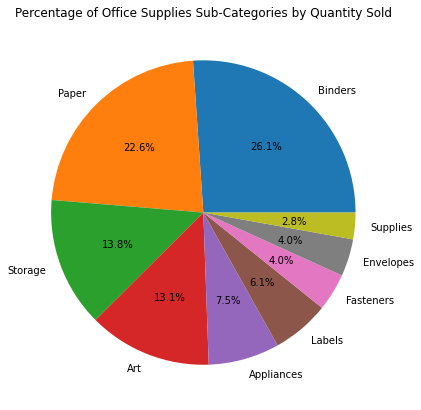

In [14]:
#Plotting Pie Chart (Office Suplies Sub-Categories by Quantity)
import matplotlib.pyplot as plt 

#https://www.geeksforgeeks.org/plot-a-pie-chart-in-python-using-matplotlib/
#http://www.learningaboutelectronics.com/Articles/How-to-create-a-pie-chart-in-matplotlib-with-Python.php

# Creating dataset
sub_cat = office_df1["Sub-Category"]
data = office_df1["Quantity"]
  
# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = sub_cat,autopct='%1.1f%%')
plt.title("Percentage of Office Supplies Sub-Categories by Quantity Sold")

# show plot
fig.savefig("Percentage of Office Supplies Sub-Categories by Quantity Sold")
plt.show()

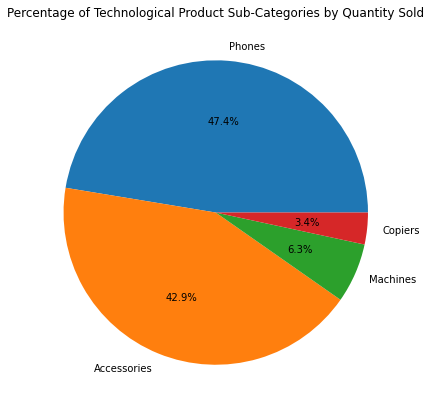

In [15]:
#Plotting Pie Chart (Technology Sub-Categories by Quantity)
import matplotlib.pyplot as plt 

#https://www.geeksforgeeks.org/plot-a-pie-chart-in-python-using-matplotlib/
#http://www.learningaboutelectronics.com/Articles/How-to-create-a-pie-chart-in-matplotlib-with-Python.php

# Creating dataset
sub_cat = tech_df1["Sub-Category"]
data = tech_df1["Quantity"]
  
# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = sub_cat,autopct='%1.1f%%')
plt.title("Percentage of Technological Product Sub-Categories by Quantity Sold")

# show plot
fig.savefig("Percentage of Technological Product Sub-Categories by Quantity Sold")
plt.show()

In [16]:
#Data Frame of an online store in Mainland United States
import pandas as pd

#Getting rid of Unecessary Columns and Data
dataset = pd.read_csv("SuperstoreDataset.csv")
dataset = dataset.drop(columns=["Customer Name","Country","Postal Code","Unnamed: 17"]).sort_values(["Region","State","City"],ascending=[True,True,True])[["Region","State","City","Customer ID","Segment","Product ID","Product Name","Category","Sub-Category","Sales","Quantity","Discount","Profit"]].reset_index().drop(columns=["index"])
dataset

#Isolating necessary columns for getting sales by segment per region
df1 = dataset[['Region','Segment','Sales']]
df1 = df1.sort_values(["Region","Segment"])

#Get Unique Regions and segments
df1["Region"].unique()
df1["Segment"].unique()

#Seperate by Region
central_cond = df1["Region"] == "Central"
east_cond = df1["Region"] == "East"
south_cond = df1["Region"] == "South"
west_cond = df1["Region"] == "West"

central_df = df1.loc[central_cond,:]
east_df = df1.loc[east_cond,:]
south_df = df1.loc[south_cond,:]
west_df = df1.loc[west_cond,:]

#Getting sales and segment per region
agg_func = {'Region': 'first', 'Sales': 'sum'}
central_df = central_df.groupby(central_df['Segment']).aggregate(agg_func)
east_df = east_df.groupby(east_df['Segment']).aggregate(agg_func)
south_df = south_df.groupby(south_df['Segment']).aggregate(agg_func)
west_df = west_df.groupby(west_df['Segment']).aggregate(agg_func)

#Remove Index

central_df.reset_index(inplace=True,drop=False)
east_df.reset_index(inplace=True,drop=False)
south_df.reset_index(inplace=True,drop=False)
west_df.reset_index(inplace=True,drop=False)



#dump
df1
central_df
east_df
south_df
west_df

,Segment,Region,Sales
0,Consumer,West,362880.7730
1,Corporate,West,225855.2745
2,Home Office,West,136721.7770


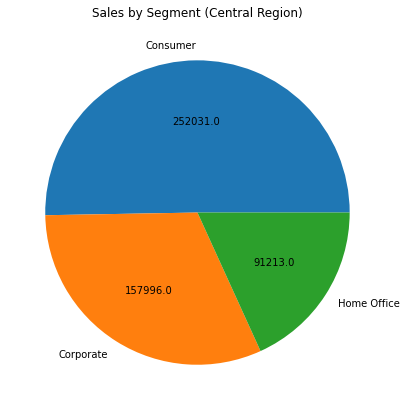

In [17]:
#Plotting Pie Chart (Sales by segments in region)
import matplotlib.pyplot as plt 
import numpy as np

#https://www.geeksforgeeks.org/plot-a-pie-chart-in-python-using-matplotlib/
#http://www.learningaboutelectronics.com/Articles/How-to-create-a-pie-chart-in-matplotlib-with-Python.php

# Creating dataset
sub_cat = central_df["Segment"]
data = central_df["Sales"]

#https://stackoverflow.com/questions/41088236/how-to-have-actual-values-in-matplotlib-pie-chart-displayed-python
def absolute_value(val):
    a  = np.round(val/100.*data.sum(), 0)
    return a

# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = sub_cat,autopct=absolute_value)
plt.title("Sales by Segment (Central Region)")

# show plot
fig.savefig("Sales by Segment (Central Region)")
plt.show()

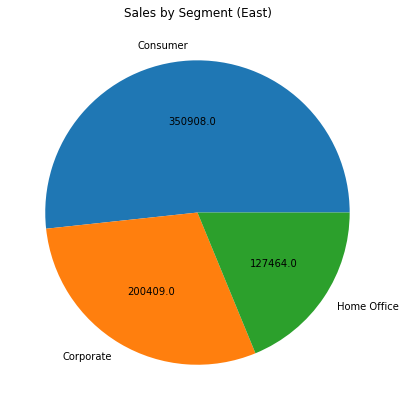

In [18]:
#Plotting Pie Chart (Sales by segments in region)
import matplotlib.pyplot as plt 
import numpy as np

#https://www.geeksforgeeks.org/plot-a-pie-chart-in-python-using-matplotlib/
#http://www.learningaboutelectronics.com/Articles/How-to-create-a-pie-chart-in-matplotlib-with-Python.php

# Creating dataset
sub_cat = east_df["Segment"]
data = east_df["Sales"]

#https://stackoverflow.com/questions/41088236/how-to-have-actual-values-in-matplotlib-pie-chart-displayed-python
def absolute_value(val):
    a  = np.round(val/100.*data.sum(), 0)
    return a

# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = sub_cat,autopct=absolute_value)
plt.title("Sales by Segment (East)")

# show plot
fig.savefig("Sales by Segment (East)")
plt.show()

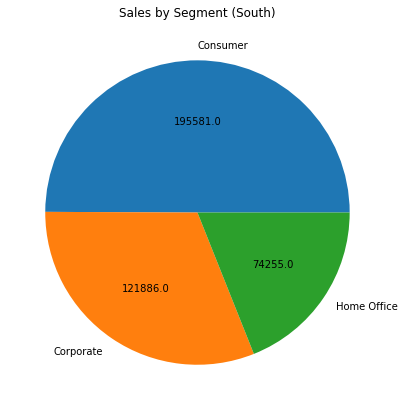

In [19]:
#Plotting Pie Chart (Sales by segments in region)
import matplotlib.pyplot as plt 
import numpy as np

#https://www.geeksforgeeks.org/plot-a-pie-chart-in-python-using-matplotlib/
#http://www.learningaboutelectronics.com/Articles/How-to-create-a-pie-chart-in-matplotlib-with-Python.php

# Creating dataset
sub_cat = south_df["Segment"]
data = south_df["Sales"]

#https://stackoverflow.com/questions/41088236/how-to-have-actual-values-in-matplotlib-pie-chart-displayed-python
def absolute_value(val):
    a  = np.round(val/100.*data.sum(), 0)
    return a

# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = sub_cat,autopct=absolute_value)
plt.title("Sales by Segment (South)")

# show plot
fig.savefig("Sales by Segment (South)")
plt.show()

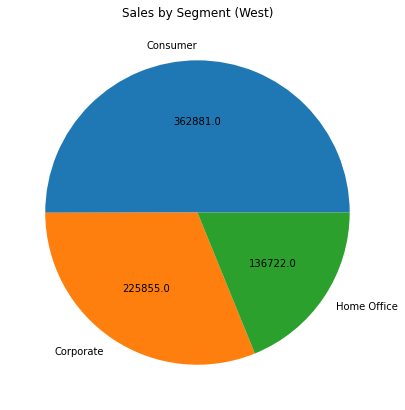

In [20]:
#Plotting Pie Chart (Sales by segments in region)
import matplotlib.pyplot as plt 
import numpy as np

#https://www.geeksforgeeks.org/plot-a-pie-chart-in-python-using-matplotlib/
#http://www.learningaboutelectronics.com/Articles/How-to-create-a-pie-chart-in-matplotlib-with-Python.php

# Creating dataset
sub_cat = west_df["Segment"]
data = west_df["Sales"]

#https://stackoverflow.com/questions/41088236/how-to-have-actual-values-in-matplotlib-pie-chart-displayed-python
def absolute_value(val):
    a  = np.round(val/100.*data.sum(), 0)
    return a

# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = sub_cat,autopct=absolute_value)
plt.title("Sales by Segment (West)")

# show plot
fig.savefig("Sales by Segment (West)")
plt.show()